# Fake News Classifier

In [ ]:
%%time
!pip install ktrain
import ktrain
from ktrain import text

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk import word_tokenize
import nltk

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, precision_recall_curve

np.random.seed(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 32.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

## Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

fake_df = pd.read_csv('/content/drive/My Drive/Fellowship/Fake.csv')
true_df = pd.read_csv('/content/drive/My Drive/Fellowship/True.csv')

# fake_df = pd.read_csv('Fake.csv')
# true_df = pd.read_csv('True.csv')

In [ ]:
fake_df.head()

In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_df['label'] = 0
true_df['label'] = 1

In [ ]:
df = true_df.append(fake_df)
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,title,text,subject,date,label
0,BREAKING: Devin Nunes Is Now The Subject Of A...,"Embattled House Intel Chairman, Devin Nunes (R...",News,"March 26, 2017",0
1,‘Russia Did It’ – The New Age of McCarthyism,Robert Parry Consortium NewsMake no mistake ab...,Middle-east,"September 30, 2017",0
2,"Back road drive, secret flight brought Trump's...",WASHINGTON (Reuters) - A secret meeting at a n...,politicsNews,"February 1, 2017",1
3,"Amid hacking row, pressure builds on Trump to ...",WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"January 9, 2017",1
4,Shkreli takes the Fifth for Senate committee o...,"(Reuters) - Martin Shkreli, former chief execu...",politicsNews,"January 20, 2016",1


In [ ]:
train, test  = train_test_split(df, train_size = 0.9, stratify = df["label"])

## Data Cleaning

In [ ]:
#stop word removal

import nltk
nltk.download('punkt')

# stopwords =list(open('/content/drive/My Drive/Fellowship/stopwords.txt', mode='r', encoding='UTF-8'))
stopwords =list(open('stopwords.txt', mode='r', encoding='UTF-8'))
stopwords = [x.strip() for x in stopwords]
def remove_stopwords(text):
    removed = []
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stopwords:
            removed.append(tokens[i])
    return " ".join(removed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['clean_text'] = df['text'].apply(lambda x: remove_stopwords(str(x)))

In [ ]:
df["text_len"] = df['text'].apply(lambda x: len(x))
df["clean_text_len"] = df['clean_text'].apply(lambda x: len(x))

In [ ]:
df.head()

,title,text,subject,date,label,text_len,clean_text,clean_text_len
0,RUBIO Sides With Democrats On Giving A Whoppin...,Democrats want to spend a whopping $2 billion ...,politics,"May 16, 2016",0,1611,Democrats spend whopping $ 2 zika virus preven...,988
1,Ted Cruz Says Endorsing Trump Is A ‘Grave Mis...,Republican presidential candidate and Texas Se...,News,"March 1, 2016",0,3039,Republican presidential candidate Texas Senato...,1837
2,"‘Responsible Gun Owner’ Road Rages, Threatens...",The National Rifle Association tells us that a...,News,"February 2, 2016",0,2132,The National Rifle Association tells ensure sa...,1281
3,TEACHER’S UNION PROTEST Gets Ugly As Protester...,"In case you don t live in the Midwest, you mig...",Government News,"Jan 20, 2016",0,2948,"In live Midwest , noticed fight continues Demo...",1886
4,Etihad advises checks with U.S. missions after...,DUBAI (Reuters) - Etihad Airways is advising s...,politicsNews,"March 7, 2017",1,1481,DUBAI ( Reuters ) - Etihad Airways advising pa...,1059


In [ ]:
df["clean_text"][1]

'Republican presidential candidate Texas Senator Ted Cruz believes ounce Donald Trump White House grave mistake confessed endorse disgraceful GOP candidate anyway.Cruz revealed Sunday CNN State Union . Host Jack Tapper Cruz attacks Trump conservatives , presidential candidate Marco Rubio ( R-FL ) . Not outdone , Cruz choice Trump , blasting runner standing Planned Parenthood , plan stay neutral Israel Palestinians , longtime support expanding Obamacare Bernie Sanders-style socialized medicine , putting government charge health care , putting government bureaucrats position ration care , seniors . Cruz , absolutely terrified President Trump America , warned : If Donald president , heck ? Even Donald . I challenges facing nation , grave roll dice . Cruz perfectly interview Trump presidency worst scenario America , Tapper pressed rival Trump nomination . Cruz answer puzzling negative Trump , Cruz : I support Republican nominee . Period . The . This response Cruz absolutely infuriating stu

In [ ]:
df["text"][1]

'Republican presidential candidate and Texas Senator Ted Cruz believes with every ounce of his being that Donald Trump in the White House is a  grave mistake  but he confessed that he would endorse the disgraceful GOP candidate anyway.Cruz revealed this on Sunday during CNN s State of the Union. Host Jack Tapper asked Cruz about the recent attacks against Trump by other conservatives, especially presidential candidate Marco Rubio (R-FL). Not to be outdone, Cruz also had some choice words for Trump, blasting the front runner for standing behind Planned Parenthood, his plan to stay neutral between Israel and the Palestinians,  and  longtime support of expanding Obamacare into Bernie Sanders-style socialized medicine, putting the government in charge of your health care, putting government bureaucrats into a position to ration your care, especially that of seniors. Cruz, absolutely terrified of what President Trump could mean for America, warned: If Donald becomes president, who the heck 

## Data Split

In [ ]:
# train/val/test split

train, val  = train_test_split(train, train_size = 0.9, stratify = train["label"])

In [ ]:
train_data = train.clean_text.tolist()
train_labels = train.label.tolist()

val_data = val.clean_text.tolist()
val_labels = val.label.tolist()

test_data = test.clean_text.tolist()
test_labels = test.label.tolist()

## RoBERTa Model Initialization and Data Preprocessing

In [ ]:
model_name = 'xlm-roberta-base'
transformer_model = text.Transformer(model_name, maxlen=517)


train = transformer_model.preprocess_train(train_data, train_labels)
val = transformer_model.preprocess_test(val_data, val_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 247
	95percentile : 570
	99percentile : 914


preprocessing test...
language: en
test sequence lengths:
	mean : 245
	95percentile : 552
	99percentile : 850


In [ ]:
model = transformer_model.get_classifier(metrics = ['accuracy'])
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=8)

## Model Training

In [ ]:
# learner.autofit(2e-5, checkpoint_folder='/content/drive/My Drive/Fellowship/ckt/new', epochs=6)
learner.autofit(2e-5, epochs=6)



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/6
4546/4546 [==============================] - 5002s 1s/step - loss: 0.0180 - mae: 0.0725 - val_loss: 0.0017 - val_mae: 0.0296
Epoch 2/6
4546/4546 [==============================] - 5011s 1s/step - loss: 0.0021 - mae: 0.0348 - val_loss: 0.0013 - val_mae: 0.0264
Epoch 3/6
2528/4546 [===============>..............] - ETA: 35:32 - loss: 0.0018 - mae: 0.0304

## Model Evaluation

In [ ]:
# model.load_weights('/content/drive/My Drive/Fellowship/ckt/new/weights-02.hdf5')

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=transformer_model)

In [ ]:
test = transformer_model.preprocess_test(test_data, test_labels)

preprocessing test...
language: en
test sequence lengths:
	mean : 248
	95percentile : 577
	99percentile : 894


In [ ]:
y_pred = predictor.predict(test_data)

In [ ]:
import numpy as np
b = [0, 1]
def findClosest(dictionary, value):
    idx = (np.abs(dictionary - value)).argmin()
    return dictionary[idx]

#[findClosest(b, elem) for elem in a]

print([findClosest(b, elem) for elem in y_pred])
pred = [findClosest(b, elem) for elem in y_pred]

[0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 

In [ ]:
true=test_labels

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
print(confusion_matrix(true,pred))

print("\nPrecison : ",precision_score(true, pred, average = 'weighted'))
print("\nRecall : ",recall_score(true, pred,  average = 'weighted'))
print("\nF1 : ",f1_score(true, pred,  average = 'weighted'))
score = roc_auc_score(true, pred)
print("\n ROC-AUC score: %.6f \n" % (score))

[[2348    0]
 [   2 2140]]

Precison :  0.9995549447945791

Recall :  0.999554565701559

F1 :  0.9995545564903356

 ROC-AUC score: 0.999533 



In [ ]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2348
           1       1.00      1.00      1.00      2142

    accuracy                           1.00      4490
   macro avg       1.00      1.00      1.00      4490
weighted avg       1.00      1.00      1.00      4490



## ROC-AUC curve

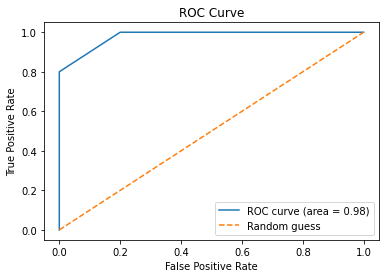

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Generate some example data
y_true = [0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
y_scores = [0.1, 0.2, 0.4, 0.5, 0.6, 0.3, 0.2, 0.8, 0.7, 0.4]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true, y_scores)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Find Misclassified Test Data

In [ ]:
incorrect_label_index = []
for i in range(len(true)):
  if true[i]!=pred[i]:
    incorrect_label_index.append(i)

In [ ]:
incorrect_label_index

[658, 1832]

In [ ]:
print(true[658]) #true
print(pred[658]) #fake

1
0


In [ ]:
print(test_data[658])

Global health officials racing understand Zika virus major outbreak Brazil spread 60 countries . The questions answers virus current outbreak : How people infected ? Zika transmitted people bite infected female mosquitoes , Aedes aegypti mosquito , type spreads dengue , chikungunya yellow fever . The Pan American Health Organization ( PAHO ) Aedes aegypti mosquitoes countries Americas Canada continental Chile , virus reach countries territories region Aedes mosquitoes . The virus transmitted sex , male female partner infected , apparent infection blood transfusion reported . How treat Zika ? There treatment vaccine Zika infection . Companies scientists racing develop safe effective vaccine Zika , preventative shot expected ready widespread . How dangerous ? The U.S. Centers Disease Control Prevention concluded infection Zika virus pregnant women birth defect microcephaly , condition defined unusually heads result developmental , severe brain abnormalities babies . The CDC causal relati

In [ ]:
print(true[1832]) #true
print(pred[1832]) #fake

1
0


Two out of 4490 news data were mislabeled and both are false negatives. To improve your model's performance on these news articles I would try the following:



*   Train the model for more epochs and then choose the one with the lowest validation loss. Due to higher computational cost and non-availability of resources the model was not trained for longer epochs
*   Tune the hyperparameters.

Given the precision, recall, F1-score, and ROC_AUC score, the model outperforms human performance. Also, gievn RoBERTa is state-of-the-art language models that ouperforms other language models not much improvement is required.